#### Exercise 1
1. Open the file './befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`

In [37]:
import numpy as np

data = np.genfromtxt('befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)
print(data[:5,:])

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 [2015    1    0 5110    1]
 [2015    1    0 5120    4]]


3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015

In [42]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
       5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
       10: 'Amager Vest', 99: 'Udenfor'}

mask = (data[:,0] == 2015)

def number_of_people_per_neighbourhood(n,mask):
    all_people_in_given_n = data[mask & (data[:,1] == n)]
    sum_of_people = all_people_in_given_n[:, 4].sum()
    
    return sum_of_people


popu_per_neighbourhood_anno_2015 = np.array([number_of_people_per_neighbourhood(n, mask) for n in neighb.keys()])

print(popu_per_neighbourhood_anno_2015)

[51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


4. Make a bar plot to show the size of each city area from the smallest to the largest

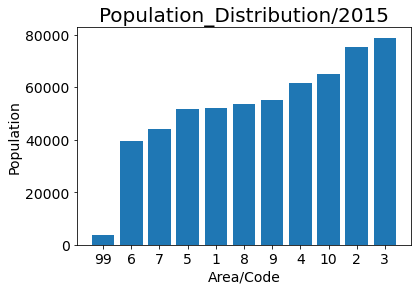

In [40]:
import matplotlib.pyplot as plt

#finding unique neighbour values
unique_neighbour_area = list(set(data[:,1]))

mydict = {}
x = 0
while x < len(unique_neighbour_area):
    mydict.update({unique_neighbour_area[x]:popu_per_neighbourhood_anno_2015[x]})
    x += 1
    
mydict_sorted = sorted(mydict.items(), key = lambda x: x[1])

list_bar_x = []
list_bar_y = []
for a in mydict_sorted:
   list_bar_x.append(str(a[0]))
   list_bar_y.append(a[1])

plt.figure()
plt.bar(list_bar_x, list_bar_y, linewidth=5)

# Set chart title and label axes. 
plt.title("Population_Distribution/2015", fontsize=20)
plt.xlabel("Area/Code", fontsize=14)
plt.ylabel("Population", fontsize=14)
 # Set size of tick labels.
plt.tick_params(axis='both', labelsize=14)
#plt.show()



5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015

In [44]:
mask_plus65 = (data[:,0] == 2015) & (data[:,2] > 65)
#print(data[mask_65])
popu_copenhagen65 =  np.sum(data[(mask_plus65)][:,4])
print(popu_copenhagen65)


55750


6. How many of those were from the other nordic countries (not dk)

In [49]:
statecodes_nordic = [5110, 5120, 5104, 5105, 5106, 5101, 5901, 5902]

def people_plus65_nordic(s,mask):
    all_people_in_given_s = data[mask & (data[:,3] == s)]
    sum_of_people = all_people_in_given_s[:, 4].sum()
    print(sum_of_people)
    return sum_of_people

nordic_popu = np.array([people_plus65_nordic(s,mask_65) for s in statecodes_nordic])

count_popu = 0
for p in nordic_popu:
    count_popu += p
print(int(count_popu))

236
267
72
2
33
0
0
0
610


7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015


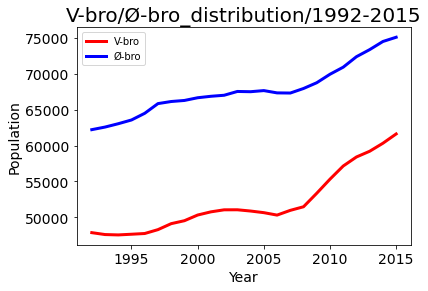

In [53]:

year = []
x = 1992
while x < 2016:
    year.append(x)
    x +=1

mask_vest = (data[:,1] == 4)
mask_oest = (data[:,1] == 2)

def vest_and_oest(y,mask):
    all_people_in_given_n = data[mask & (data[:,0] == y)]
    sum_of_people = all_people_in_given_n[:, 4].sum()
    return sum_of_people
    
popu_vest = np.array([vest_and_oest(y, mask_vest) for y in year])

popu_oest = np.array([vest_and_oest(y, mask_oest) for y in year])

plt.figure()
plt.plot(year,popu_vest,linewidth=3,color='red',label='V-bro')
plt.plot(year,popu_oest,linewidth=3,color='blue',label='Ø-bro')
plt.title("V-bro/Ø-bro_distribution/1992-2015", fontsize=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Population", fontsize=14)
 # Set size of tick labels.
plt.tick_params(axis='both', labelsize=14)
plt.legend()
plt.show()
  